In [178]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import quandl
from datetime import datetime as dt
import datetime
import seaborn as sns
%matplotlib inline

In [3]:
tickers = ['NSE/ICICIBANK','NSE/SBIN','NSE/AXISBANK']

In [4]:
def get_data(ticker,start,end):
    def data(ticker):
        return quandl.get(ticker, authtoken="Gw-UU-RZKx9mWqJy-gsP", start_date = start, end_date = end)
    datas = map(data, tickers)
    return pd.concat(datas, keys = tickers,names = ['ticker','Date'])

In [5]:
data = get_data(tickers, '2006-10-01','')

In [8]:
data.head(3)

Open   High    Low    Last   Close  \
ticker        Date                                              
NSE/ICICIBANK 2006-10-03  700.0  708.0  691.5  692.10  697.75   
              2006-10-04  675.6  698.0  675.6  693.55  695.05   
              2006-10-05  696.0  709.8  696.0  706.00  705.85   

                          Total Trade Quantity  Turnover (Lacs)  
ticker        Date                                               
NSE/ICICIBANK 2006-10-03              760505.0          5330.94  
              2006-10-04              711991.0          4938.19  
              2006-10-05              939896.0          6636.14

In [84]:
data.tail(3)

Open    High    Low    Last   Close  \
ticker       Date                                                
NSE/AXISBANK 2018-02-19  537.85  544.95  527.5  541.75  540.55   
             2018-02-20  542.00  548.05  529.4  530.70  531.70   
             2018-02-21  534.00  538.50  524.4  536.00  535.80   

                         Total Trade Quantity  Turnover (Lacs)  
ticker       Date                                               
NSE/AXISBANK 2018-02-19             4251723.0         22703.78  
             2018-02-20             3395183.0         18335.23  
             2018-02-21             4638382.0         24646.81

In [6]:
data.index

MultiIndex(levels=[['NSE/ICICIBANK', 'NSE/SBIN', 'NSE/AXISBANK'], [2006-10-03 00:00:00, 2006-10-04 00:00:00, 2006-10-05 00:00:00, 2006-10-06 00:00:00, 2006-10-09 00:00:00, 2006-10-10 00:00:00, 2006-10-11 00:00:00, 2006-10-12 00:00:00, 2006-10-13 00:00:00, 2006-10-16 00:00:00, 2006-10-17 00:00:00, 2006-10-18 00:00:00, 2006-10-19 00:00:00, 2006-10-20 00:00:00, 2006-10-21 00:00:00, 2006-10-23 00:00:00, 2006-10-26 00:00:00, 2006-10-27 00:00:00, 2006-10-30 00:00:00, 2006-10-31 00:00:00, 2006-11-01 00:00:00, 2006-11-02 00:00:00, 2006-11-03 00:00:00, 2006-11-06 00:00:00, 2006-11-07 00:00:00, 2006-11-08 00:00:00, 2006-11-09 00:00:00, 2006-11-10 00:00:00, 2006-11-13 00:00:00, 2006-11-14 00:00:00, 2006-11-15 00:00:00, 2006-11-16 00:00:00, 2006-11-17 00:00:00, 2006-11-20 00:00:00, 2006-11-21 00:00:00, 2006-11-22 00:00:00, 2006-11-23 00:00:00, 2006-11-24 00:00:00, 2006-11-27 00:00:00, 2006-11-28 00:00:00, 2006-11-29 00:00:00, 2006-11-30 00:00:00, 2006-12-01 00:00:00, 2006-12-04 00:00:00, 2006-12-0

In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

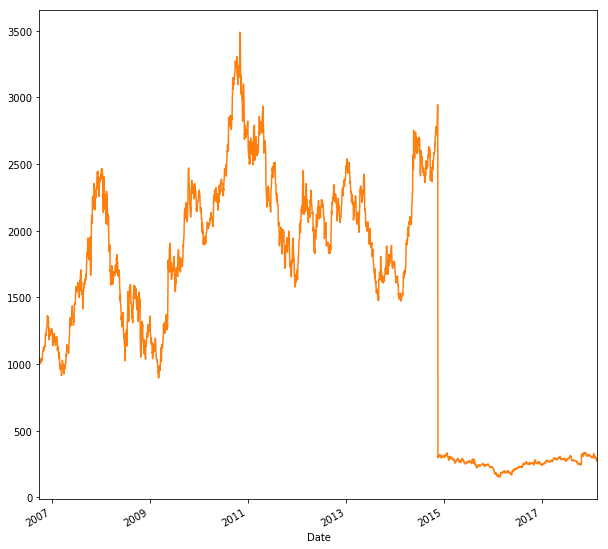

In [116]:
data.loc['NSE/SBIN']['Close'].plot(figsize = (10,10))
plt.show()

In [11]:
all_data = get_data(tickers, '2015-01-01','')

In [80]:
sample = all_data.sample(20)
print(sample)

                            Open    High     Low    Last   Close  \
ticker        Date                                                 
NSE/ICICIBANK 2018-01-18  350.00  353.20  343.00  346.00  346.15   
NSE/AXISBANK  2017-11-14  537.35  549.95  532.60  547.60  545.65   
NSE/ICICIBANK 2015-04-13  319.90  319.90  316.00  317.00  316.90   
              2015-05-18  315.00  316.90  312.90  316.10  316.25   
              2015-05-25  312.00  314.10  310.95  312.70  312.15   
NSE/SBIN      2015-02-10  277.50  290.80  275.70  289.75  287.30   
              2016-04-06  185.00  185.50  182.20  183.80  183.85   
NSE/AXISBANK  2016-04-13  440.05  445.30  438.10  439.50  440.50   
              2016-11-11  505.00  512.70  495.00  495.45  498.75   
NSE/ICICIBANK 2016-10-10  251.90  253.20  249.15  250.80  250.10   
NSE/SBIN      2017-05-03  289.40  293.20  285.80  289.40  289.80   
NSE/AXISBANK  2016-04-26  470.10  484.90  463.65  477.80  480.20   
NSE/SBIN      2015-04-20  291.00  293.35  284.85

In [41]:
close_dat = pd.DataFrame({'AXISBANK' : all_data.loc['NSE/AXISBANK']['Close'], 
                          'ICICIBANK' : all_data.loc['NSE/ICICIBANK']['Close']})

In [42]:
close_dat.head(3)

,AXISBANK,ICICIBANK
Date,,
2015-01-01,503.05,352.30
2015-01-02,514.30,362.30
2015-01-05,517.55,363.05


In [16]:
close_data = all_data['Close'].reset_index().pivot('Date','ticker','Close')

In [17]:
close_data.head(3)

ticker,NSE/AXISBANK,NSE/ICICIBANK,NSE/SBIN
Date,,,
2015-01-01,503.05,352.30,314.00
2015-01-02,514.30,362.30,315.25
2015-01-05,517.55,363.05,312.75


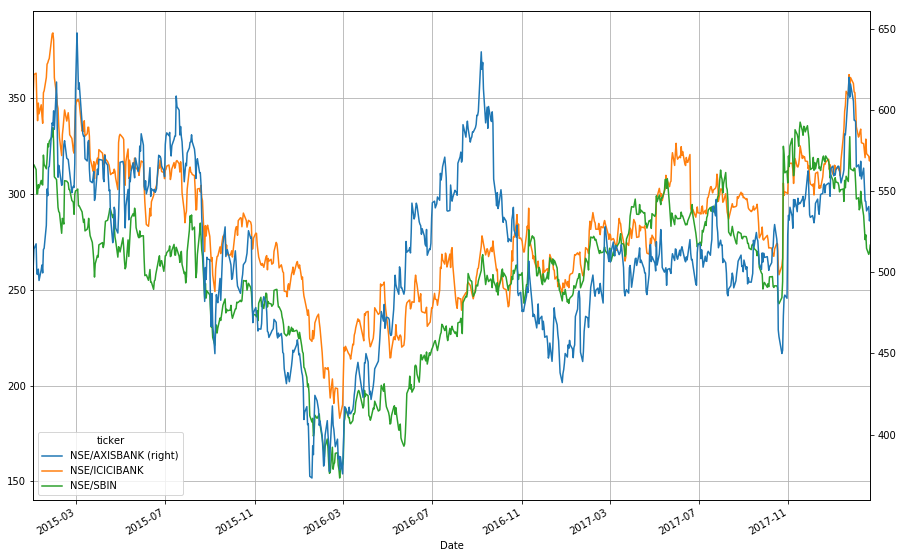

In [20]:
close_data.plot(secondary_y = ['NSE/AXISBANK'],figsize = (15,10),grid = True)
plt.show()

In [21]:
pct_change = close_data.pct_change()
quaterly_change = pct_change.resample('4M').mean()
yearly_change = pct_change.resample('12M').mean()

In [22]:
print('daily_change')
pct_change.describe()

daily_change


ticker,NSE/AXISBANK,NSE/ICICIBANK,NSE/SBIN
count,778.000000,778.000000,778.000000
mean,0.000271,0.000080,0.000062
std,0.019481,0.020415,0.022336
min,-0.094807,-0.089545,-0.082617
25%,-0.010090,-0.010902,-0.011397
50%,0.000041,-0.001023,-0.000353
75%,0.009683,0.010365,0.010375
max,0.080888,0.146877,0.276872


In [23]:
print('quaterly_change')
quaterly_change.describe()

quaterly_change


ticker,NSE/AXISBANK,NSE/ICICIBANK,NSE/SBIN
count,11.000000,11.000000,11.000000
mean,0.000255,-0.000359,-0.000707
std,0.003760,0.002838,0.003524
min,-0.007141,-0.007027,-0.009508
25%,-0.001647,-0.001738,-0.001512
50%,0.000220,0.000547,-0.000560
75%,0.001681,0.001300,0.001704
max,0.008049,0.003128,0.003061


In [24]:
print('yearly_change')
yearly_change.describe()

yearly_change


ticker,NSE/AXISBANK,NSE/ICICIBANK,NSE/SBIN
count,5.000000,5.000000,5.000000
mean,0.000301,-0.001007,-0.001860
std,0.005445,0.003588,0.004511
min,-0.007141,-0.007027,-0.009508
25%,-0.001234,-0.001626,-0.001984
50%,0.000719,0.000879,-0.000560
75%,0.001109,0.001263,0.000993
max,0.008049,0.001477,0.001756


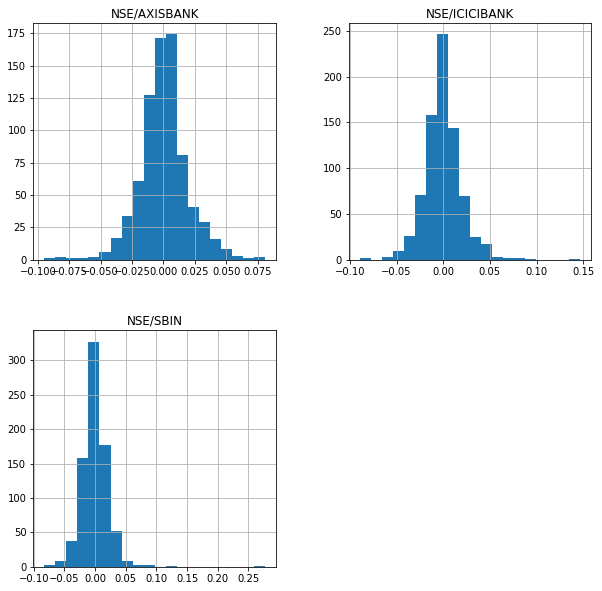

In [25]:
pct_change.hist(bins = 20,figsize = (10,10), grid = True)
plt.show()

daily_pct_change


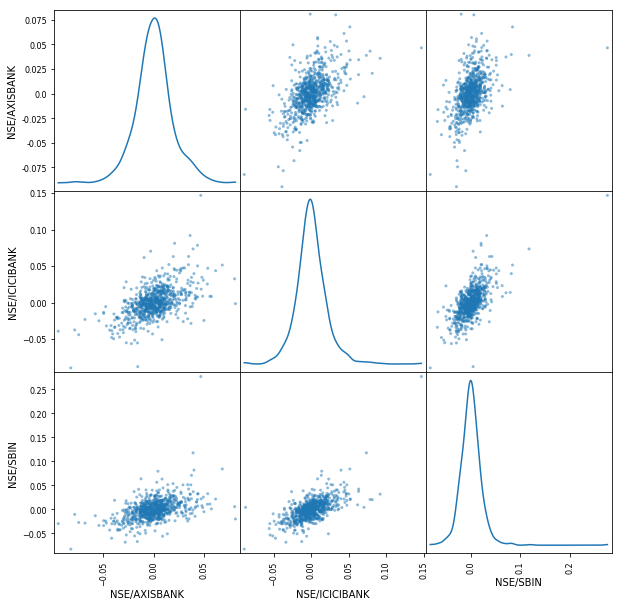

In [26]:
print('daily_pct_change')
pd.plotting.scatter_matrix(pct_change, diagonal = 'kde',figsize = (10,10))
plt.show()

In [27]:
cum_return = (1+pct_change).cumprod()

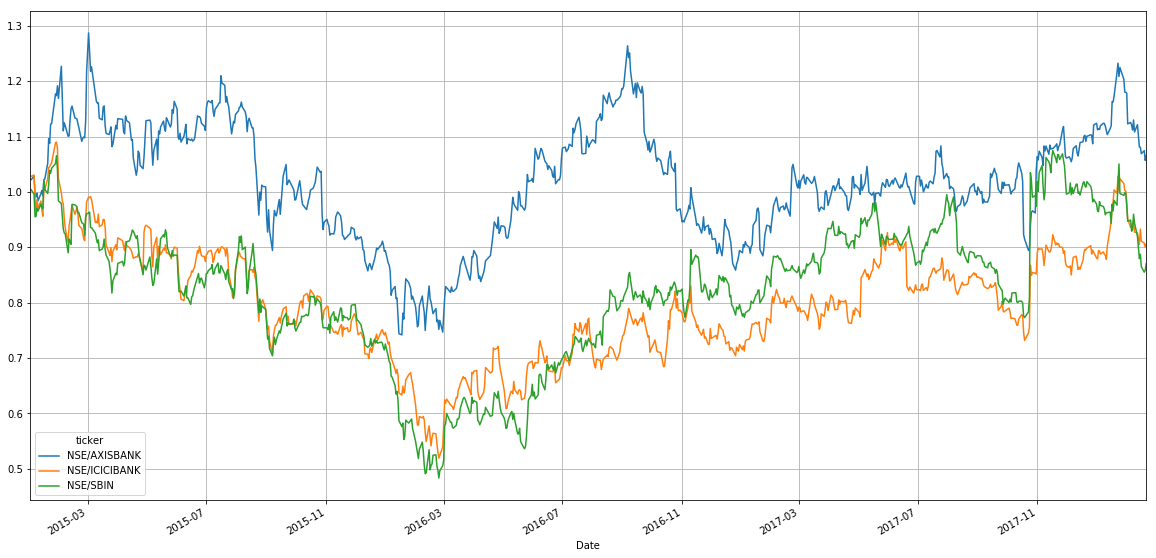

In [28]:
cum_return.plot(figsize = (20,10),grid = True)
plt.show()

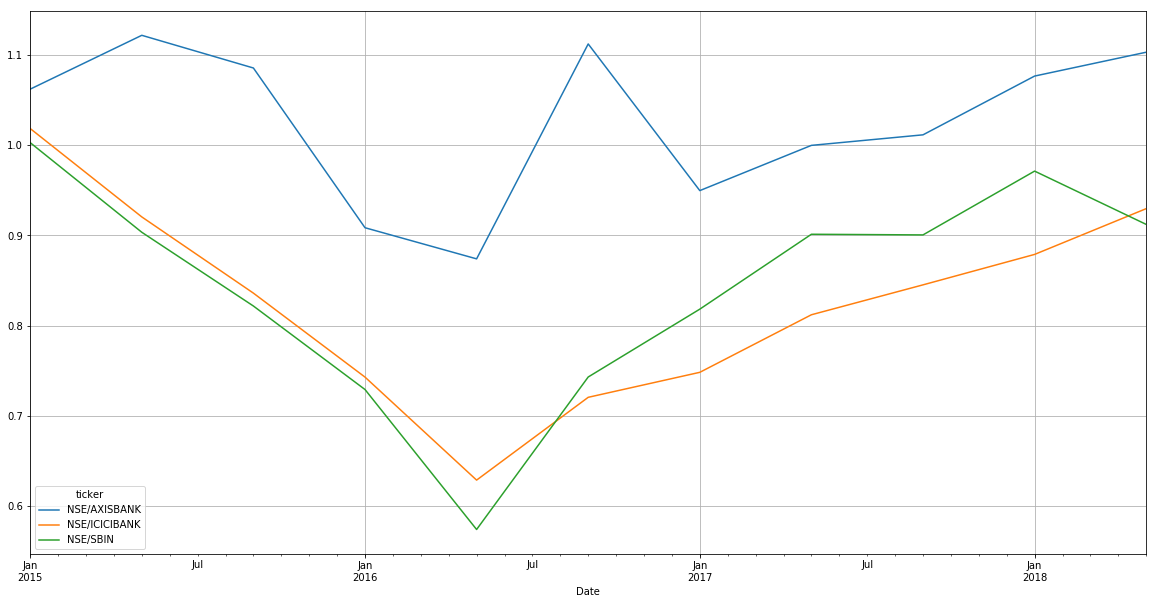

In [29]:
cum_return.resample('4M').mean().plot(figsize = (20,10),grid = True)
plt.show()

daily_cum_return


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212225C12E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002122106D0B8>]], dtype=object)

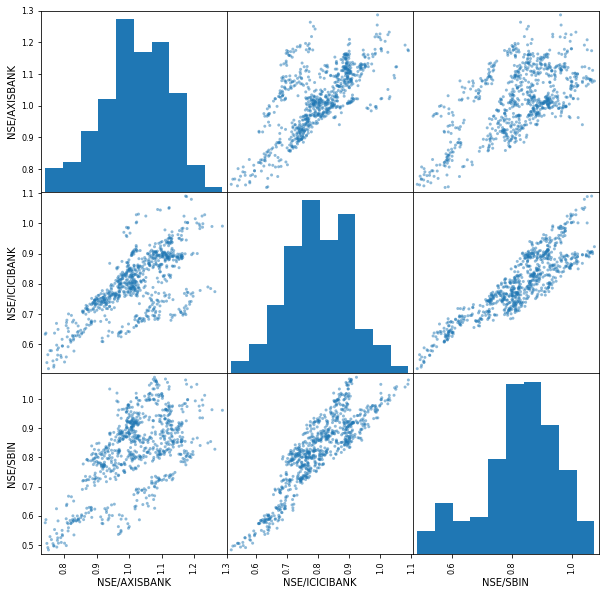

In [179]:
print('daily_cum_return')
display(pd.plotting.scatter_matrix(cum_return,figsize = (10,10)))

In [36]:
volatility = pct_change.rolling(21).std()

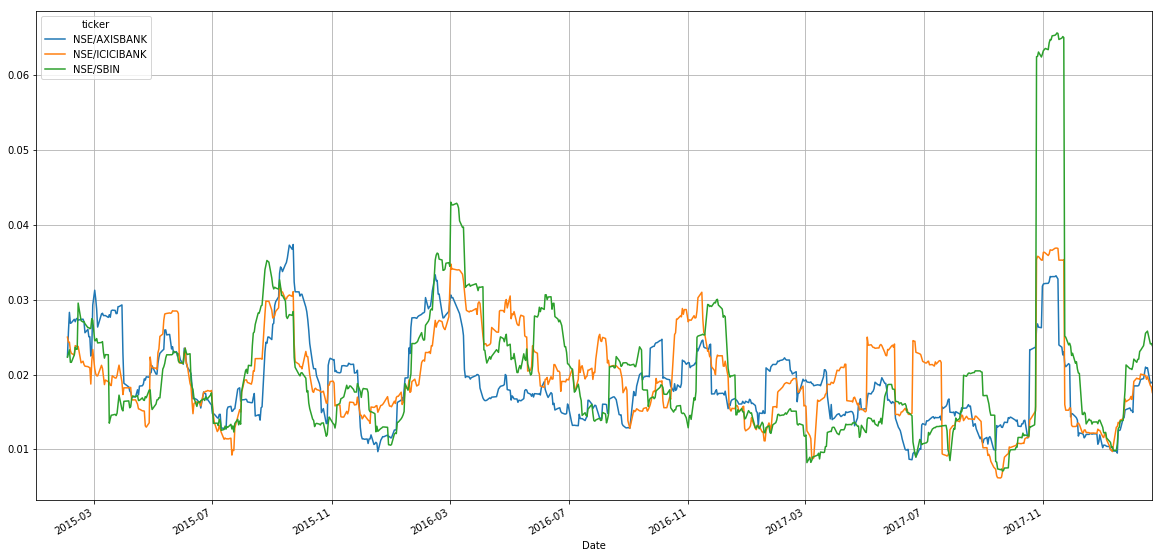

In [180]:
display(volatility.plot(figsize = (20,10),grid = True))

In [113]:
volatility.tail(2)

ticker,NSE/AXISBANK,NSE/ICICIBANK,NSE/SBIN
Date,,,
2018-02-20,0.018980,0.018378,0.024156
2018-02-21,0.018925,0.017601,0.023869


In [114]:
volatility.mean()

ticker
NSE/AXISBANK     0.018793
NSE/ICICIBANK    0.019552
NSE/SBIN         0.020059
dtype: float64

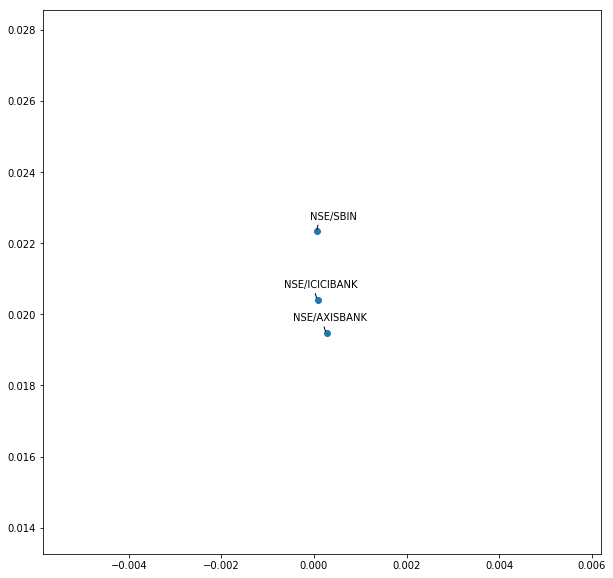

In [137]:
plt.figure(figsize = (10,10))
plt.scatter(pct_change.mean(), pct_change.std())

for label, x, y in zip(pct_change.columns, pct_change.mean(), pct_change.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (40, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))
    
plt.show()

In [71]:
correlation = pct_change.corr()

In [72]:
correlation

ticker,NSE/AXISBANK,NSE/ICICIBANK,NSE/SBIN
ticker,,,
NSE/AXISBANK,1.000000,0.552073,0.463247
NSE/ICICIBANK,0.552073,1.000000,0.657571
NSE/SBIN,0.463247,0.657571,1.000000


([<matplotlib.axis.YTick at 0x212221e7c18>,
 <a list of 3 Text yticklabel objects>)

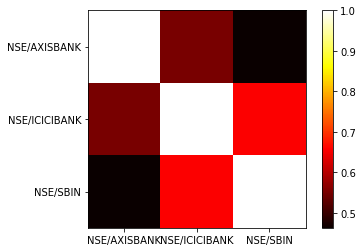

In [231]:
plt.imshow(correlation, cmap = 'hot')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns)
plt.yticks(range(len(correlation)), correlation.columns)
